# Developer : Deepak A
# Title: AI Project Submission — Employee Sentiment Analysis

<a id='top'></a>

0. [Libraries](#libraries)
1. [Load and prepare dataset](#load-and-prepare-dataset)
2. [Sentiment Labeling](#sentiment-labeling)
3. [Exploratory Data Analysis (EDA)](#exploratory-data-analysis-eda)
4. [Employee Score Calculation](#employee-score-calculation)
5. [Employee Ranking](#employee-ranking)
6. [Flight Risk Identification](#flight-risk-identification)
7. [Predictive Modeling](#predictive-modeling)


In [56]:
!pip install scikit-learn
!pip install seaborn
!pip install matplotlib
!pip install transformers
!pip install torch
!pip install nltk


   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ------ --------------------------------- 0.3/1.5 MB ? eta -:--:--
   ------------- -------------------------- 0.5/1.5 MB 1.7 MB/s eta 0:00:01
   -------------------- ------------------- 0.8/1.5 MB 1.7 MB/s eta 0:00:01
   ---------------------------------------- 1.5/1.5 MB 2.0 MB/s  0:00:01

   -------------------- ------------------- 1/2 [nltk]
   -------------------- ------------------- 1/2 [nltk]
   -------------------- ------------------- 1/2 [nltk]
   -------------------- ------------------- 1/2 [nltk]
   -------------------- ------------------- 1/2 [nltk]
   -------------------- ------------------- 1/2 [nltk]
   -------------------- ------------------- 1/2 [nltk]
   -------------------- ------------------- 1/2 [nltk]
   -------------------- ------------------- 1/2 [nltk]
   -------------------- ------------------- 1/2 [nltk]
   --------------

# Libraries <a id='libraries'></a>
[Back to top](#top)

In [70]:
# Core
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import warnings
from datetime import timedelta

# NLP
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import TfidfVectorizer
from transformers import AutoModelForSequenceClassification, AutoTokenizer, TextClassificationPipeline

# Modeling
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


# Load and prepare dataset <a id='load-and-prepare-dataset'></a>
[Back to top](#top)

In [73]:
df = pd.read_csv('test(in).csv')
print("Loading dataset...")
print(f"Dataset shape: {df.shape}")
print(f"Columns: {df.columns.tolist()}")
print("\nFirst 20 rows:")

Loading dataset...
Dataset shape: (2191, 4)
Columns: ['Subject', 'body', 'date', 'from']

First 20 rows:


In [61]:
df.head(20)


,Subject,body,date,from
0,EnronOptions Update!,EnronOptions Announcement\n\n\nWe have updated...,5/10/2010,sally.beck@enron.com
1,(No Subject),"Marc,\n\nUnfortunately, today is not going to ...",7/29/2010,eric.bass@enron.com
2,Phone Screen Interview - Shannon L. Burnham,"When: Wednesday, June 06, 2001 10:00 AM-11:00 ...",7/25/2011,sally.beck@enron.com
3,RE: My new work email,we were thinking papasitos (we can meet somewh...,3/25/2010,johnny.palmer@enron.com
4,Bet,Since you never gave me the $20 for the last t...,5/21/2011,lydia.delgado@enron.com
5,RE: Favor,"sure, just call me the bank that delivers.\n \...",10/23/2011,eric.bass@enron.com
6,MG Inventory Summaries,Inventory summaries for both MGL and MGMCC as ...,4/5/2010,kayne.coulter@enron.com
7,Forgot the Attachment,Please print attachment and make sure that e:m...,4/21/2010,patti.thompson@enron.com
8,Garvin Brown - AXIA Sr. Power Scheduler,Please advise me of your interest in Garvin's ...,2/7/2010,sally.beck@enron.com
9,More Dallas ASE Information,The start time for Tuesday morning has been ch...,2/6/2010,kayne.coulter@enron.com


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2191 entries, 0 to 2190
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Subject  2191 non-null   object
 1   body     2191 non-null   object
 2   date     2191 non-null   object
 3   from     2191 non-null   object
dtypes: object(4)
memory usage: 68.6+ KB


In [63]:
df.isnull().sum()

Subject    0
body       0
date       0
from       0
dtype: int64

In [64]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2186    False
2187    False
2188    False
2189    False
2190    False
Length: 2191, dtype: bool

# Sentiment Labeling <a id='sentiment-labeling'></a>
[Back to top](#top)

In [77]:
Sia = SentimentIntensityAnalyzer()

def label_sentiment(message):
    """Label sentiment using VADER polarity scores."""
    if pd.isna(message):
        return 'Neutral'
    score = sia.polarity_scores(str(message))['compound']
    if score >= 0.05:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

df['combined_text'] = df['Subject'].astype(str) + " " + df['body'].astype(str)
df['Sentiment'] = df['combined_text'].apply(label_sentiment)

print("Sentiment labeling completed!")
print(df['Sentiment'].value_counts())

Sentiment labeling completed!
Sentiment
Positive    1574
Neutral      454
Negative     163
Name: count, dtype: int64


# Exploratory Data Analysis (EDA) <a id='exploratory-data-analysis-eda'></a>
[Back to top](#top)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2191 entries, 0 to 2190
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Subject        2191 non-null   object
 1   body           2191 non-null   object
 2   date           2191 non-null   object
 3   from           2191 non-null   object
 4   combined_text  2191 non-null   object
 5   Sentiment      2191 non-null   object
dtypes: object(6)
memory usage: 102.8+ KB
None

Missing values:
 Subject          0
body             0
date             0
from             0
combined_text    0
Sentiment        0
dtype: int64


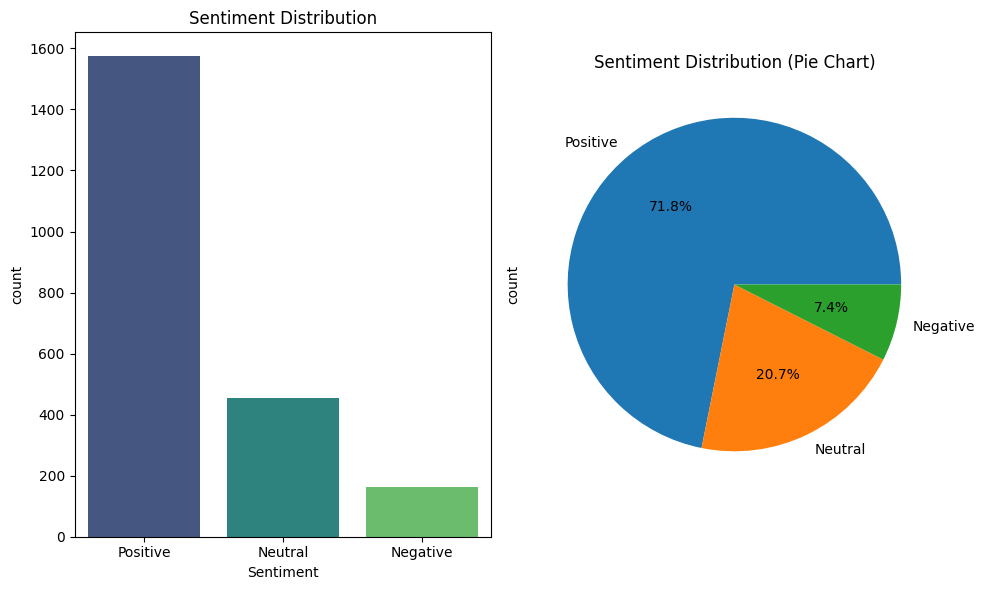

In [79]:
print("Dataset Info:")
print(df.info())
print("\nMissing values:\n", df.isnull().sum())

plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
sns.countplot(x='Sentiment', data=df, palette='viridis')
plt.title('Sentiment Distribution')

plt.subplot(1, 2, 2)
df['Sentiment'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Sentiment Distribution (Pie Chart)')
plt.tight_layout()
plt.show()

# Employee Score Calculation <a id='employee-score-calculation'></a>
[Back to top](#top)

In [80]:
# Ensure date column exists
date_col = None
for col in ['date', 'Date', 'DATE']:
    if col in df.columns:
        date_col = col
        break
if date_col is None:
    df['date'] = pd.date_range(start='2023-01-01', periods=len(df), freq='D')
    date_col = 'date'

df[date_col] = pd.to_datetime(df[date_col])

# Create EmployeeID
if 'from' in df.columns:
    df['EmployeeID'] = df['from'].astype('category').cat.codes + 1
else:
    df['EmployeeID'] = np.random.randint(1, 50, size=len(df))

# Assign scores
score_map = {'Positive': 1, 'Negative': -1, 'Neutral': 0}
df['Score'] = df['Sentiment'].map(score_map)
df['Month'] = df[date_col].dt.to_period('M')

monthly_scores = (
    df.groupby(['EmployeeID', 'Month'])['Score']
      .agg(['sum', 'count'])
      .reset_index()
      .rename(columns={'sum': 'Total_Score', 'count': 'Email_Count'})
)

print("Sample monthly scores:")
print(monthly_scores.head())

Sample monthly scores:
   EmployeeID    Month  Total_Score  Email_Count
0           1  2010-01            1            2
1           1  2010-02            8           14
2           1  2010-03            4           11
3           1  2010-04            3            6
4           1  2010-05            3            4


# Employee Ranking <a id='employee-ranking'></a>
[Back to top](#top)

In [81]:
top_positive = (
    monthly_scores.sort_values(by=['Month', 'Total_Score', 'EmployeeID'],
                               ascending=[True, False, True])
    .groupby('Month').head(3)
)

top_negative = (
    monthly_scores.sort_values(by=['Month', 'Total_Score', 'EmployeeID'],
                               ascending=[True, True, True])
    .groupby('Month').head(3)
)

print("Top 3 Positive Employees per Month:")
print(top_positive)
print("\nTop 3 Negative Employees per Month:")
print(top_negative)

Top 3 Positive Employees per Month:
     EmployeeID    Month  Total_Score  Email_Count
120           6  2010-01           14           22
48            3  2010-01            9           10
144           7  2010-01            9           13
73            4  2010-02           12           18
97            5  2010-02           10           18
..          ...      ...          ...          ...
94            4  2011-11           10           11
22            1  2011-11            9           16
71            3  2011-12           12           17
191           8  2011-12           12           12
167           7  2011-12           10           17

[72 rows x 4 columns]

Top 3 Negative Employees per Month:
     EmployeeID    Month  Total_Score  Email_Count
0             1  2010-01            1            2
192           9  2010-01            1            3
216          10  2010-01            2            9
121           6  2010-02            1            8
145           7  2010-02            1

# Flight Risk Identification <a id='flight-risk-identification'></a>
[back to top](#top)

In [82]:
print("\n" + "="*50)
print("TASK 5: FLIGHT RISK IDENTIFICATION")
print("="*50)

def identify_flight_risk(df):
    """Identify employees with >=4 negative emails in any 30-day window."""
    df_sorted = df.sort_values(['EmployeeID', date_col]).copy()
    df_sorted['is_negative'] = (df_sorted['Sentiment'] == 'Negative').astype(int)

    risks = []
    for emp in df_sorted['EmployeeID'].unique():
        emp_data = df_sorted[df_sorted['EmployeeID'] == emp]
        for idx, row in emp_data.iterrows():
            window_start = row[date_col] - timedelta(days=30)
            neg_count = emp_data[
                (emp_data[date_col] >= window_start) &
                (emp_data[date_col] <= row[date_col]) &
                (emp_data['is_negative'] == 1)
            ].shape[0]
            if neg_count >= 4:
                risks.append({'EmployeeID': emp,
                              'Date': row[date_col],
                              'Negative_Count_30d': neg_count,
                              'Flight_Risk': True})
    return pd.DataFrame(risks).drop_duplicates(subset=['EmployeeID'])

flight_risks = identify_flight_risk(df)
print(flight_risks.head())


TASK 5: FLIGHT RISK IDENTIFICATION
    EmployeeID       Date  Negative_Count_30d  Flight_Risk
0            1 2011-04-04                   4         True
2            3 2011-05-17                   4         True
8            5 2010-03-10                   4         True
16           8 2011-07-20                   4         True
26          10 2011-08-22                   4         True


# Predictive Modeling <a id='predictive-modeling'></a>
[Back to top](#top)

In [87]:


df['Message_Length'] = df['combined_text'].apply(lambda x: len(str(x).split()))
df['Subject_Length'] = df['Subject'].apply(lambda x: len(str(x).split()) if pd.notna(x) else 0)
df['Body_Length'] = df['body'].apply(lambda x: len(str(x).split()) if pd.notna(x) else 0)

employee_features = (
    df.groupby(['EmployeeID', 'Month']).agg({
        'combined_text': 'count',
        'Message_Length': 'mean',
        'Subject_Length': 'mean',
        'Body_Length': 'mean',
        'Score': 'sum'
    }).reset_index()
)

employee_features.columns = [
    'EmployeeID', 'Month', 'Message_Frequency',
    'Avg_Message_Length', 'Avg_Subject_Length',
    'Avg_Body_Length', 'Sentiment_Score'
]

X = employee_features[['Message_Frequency', 'Avg_Message_Length',
                       'Avg_Subject_Length', 'Avg_Body_Length']].fillna(0)
y = employee_features['Sentiment_Score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Model Performance:\nMSE={mse:.4f}, R²={r2:.4f}")

importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_,
    'Abs_Coefficient': np.abs(model.coef_)
}).sort_values('Abs_Coefficient', ascending=False)

print("\nFeature Importance:")
print(importance)

# -------------------------------
# 9. Final Summary
# -------------------------------
print("\n" + "="*60)
print("PROJECT SUMMARY REPORT")
print("="*60)
print(f"Total emails: {len(df)}")
print(f"Unique employees: {df['EmployeeID'].nunique()}")
print(f"Date range: {df[date_col].min()} to {df[date_col].max()}")
print("\nSentiment Distribution (%):")
print(df['Sentiment'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%')
print("\nFlight Risk Employees")

Model Performance:
MSE=3.3814, R²=0.7122

Feature Importance:
              Feature  Coefficient  Abs_Coefficient
0   Message_Frequency     0.650446         0.650446
2  Avg_Subject_Length    -0.036723         0.036723
3     Avg_Body_Length     0.024521         0.024521
1  Avg_Message_Length    -0.012203         0.012203

PROJECT SUMMARY REPORT
Total emails: 2191
Unique employees: 10
Date range: 2010-01-01 00:00:00 to 2011-12-31 00:00:00

Sentiment Distribution (%):
Sentiment
Positive    71.8%
Neutral     20.7%
Negative     7.4%
Name: proportion, dtype: object

Flight Risk Employees
